# Six-letter words

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import fem
data_dir = '../../../data/words'
print 'number of threads: %i' % (fem.fortran_module.fortran_module.num_threads(),)

number of threads: 32


In [14]:
words = np.loadtxt(os.path.join(data_dir, '06.txt'), dtype='U6')
unique_words = np.unique(words)
print 'number of words: %i, number of unique words: %i' % (len(words), len(unique_words))

number of words: 633565, number of unique words: 20083


In [15]:
print 'random word:', np.random.choice(words)

random word: poison


In [16]:
words = np.array([np.array(list(word)) for word in words]).T
n, l = words.shape
print 'word length (n): %i, number of words (l): %i' % (n, l)

word length (n): 6, number of words (l): 633565


In [17]:
w, d = fem.discrete.fit.fit(words, degs=[1], iters=10)

In [18]:
d

[array([0.00147929, 0.00147929, 0.00147929, 0.00147929, 0.00147929,
        0.00147929, 0.00147929, 0.00147929, 0.00147929]),
 array([0.00147929, 0.00147929, 0.00147929, 0.00147929, 0.00147929,
        0.00147929, 0.00147929, 0.00147929, 0.00147929]),
 array([0.00147929, 0.00147929, 0.00147929, 0.00147929, 0.00147929,
        0.00147929, 0.00147929, 0.00147929, 0.00147929]),
 array([0.00147929, 0.00147929, 0.00147929, 0.00147929, 0.00147929,
        0.00147929, 0.00147929, 0.00147929, 0.00147929]),
 array([0.00147929, 0.00147929, 0.00147929, 0.00147929, 0.00147929,
        0.00147929, 0.00147929, 0.00147929, 0.00147929]),
 array([0.00147929, 0.00147929, 0.00147929, 0.00147929, 0.00147929,
        0.00147929, 0.00147929, 0.00147929, 0.00147929])]

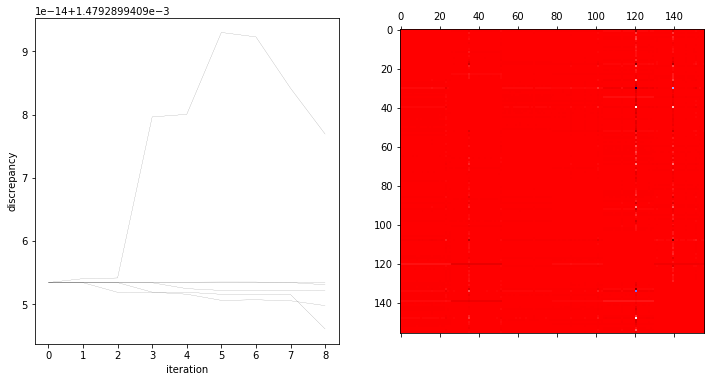

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
for di in d:
    ax[0].plot(di, 'k-', lw=0.1)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')

ax[1].matshow(w[1], aspect='equal', cmap=plt.cm.seismic)
plt.show()

In [20]:
ltn = dict(zip(list('abcdefghijklmnopqrstuvwxyz'),range(26)))
ntl = dict(zip(range(26),list('abcdefghijklmnopqrstuvwxyz')))
x = np.zeros(6*26)
j = np.random.randint(words.shape[1])
k = np.random.randint(6)
print k
print ''.join(words[:,j])
x[[26*i+ltn[l] for i,l in enumerate(words[:,j])]] = 1
x[k*26:(k+1)*26] = 0
print ''.join([ntl[n] for n in np.argmax(np.split(w[1].dot(x), 6), axis=1)])

5
casing
qupied


In [ ]:
# h1_filter = h1.flatten()
# order = h1_filter.argsort()
# bottom, top = order[:100], order[-100:]
# zeros = list(set(range(len(h1_filter))) - set(top) - set(bottom))
# h1_filter[zeros] = 0
# h1_filter = h1_filter.reshape((6*26, 6*26))

# fig = plt.figure(figsize=(8,8))
# ax = plt.gca()
# ax.imshow(h1_filter, aspect='equal', cmap=plt.cm.seismic, vmin=-1, vmax=1)
# ax.axis('off')
# plt.show()

In [ ]:
# np.where(h1_filter > 0), np.where(h1_filter < 0)